In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\diabetes.csv")

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.isin(['?']).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
X=df.drop("Outcome",axis=1)
y=df.Outcome

<function matplotlib.pyplot.show(close=None, block=None)>

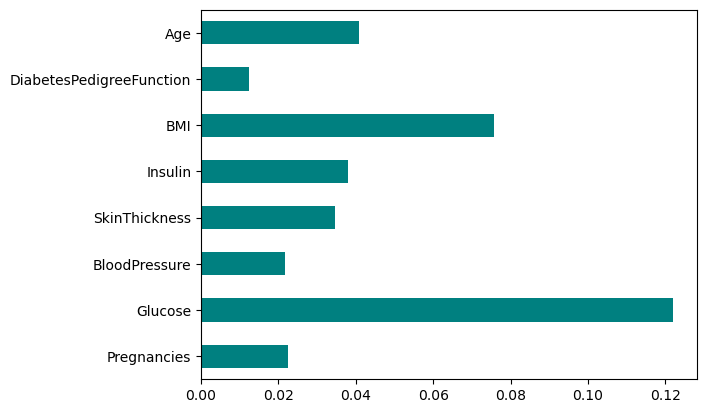

In [27]:
from sklearn.feature_selection import mutual_info_classif
imp=mutual_info_classif(X,y)
imp_f=pd.Series(imp,df.columns[0:len(df.columns[0:len(df.columns)-1])])
imp_f.plot(kind="barh",color="teal")
plt.show

In [28]:
imp

array([0.02245728, 0.1220988 , 0.02171685, 0.0346921 , 0.03786024,
       0.07582927, 0.01228074, 0.04078024])

In [29]:
imp_f

Pregnancies                 0.022457
Glucose                     0.122099
BloodPressure               0.021717
SkinThickness               0.034692
Insulin                     0.037860
BMI                         0.075829
DiabetesPedigreeFunction    0.012281
Age                         0.040780
dtype: float64

In [30]:
X=df.drop(['SkinThickness','DiabetesPedigreeFunction','Outcome'],axis=1)
y=df.Outcome

In [31]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=42)

In [32]:
print("Shape of Xtrain", Xtrain.shape)
print("Shape of Xtest",Xtest.shape)
print("Shape of ytrain", ytrain.shape)
print("Shape of ytest", ytest.shape)

Shape of Xtrain (691, 6)
Shape of Xtest (77, 6)
Shape of ytrain (691,)
Shape of ytest (77,)


In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xtrain_tf=ss.fit_transform(Xtrain)
Xtest_tf=ss.fit_transform(Xtest)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
dtc.fit(Xtrain_tf,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [35]:
dtc.score(Xtrain_tf,ytrain)

0.7727930535455861

In [36]:
dtc.score(Xtest_tf,ytest)

0.7792207792207793

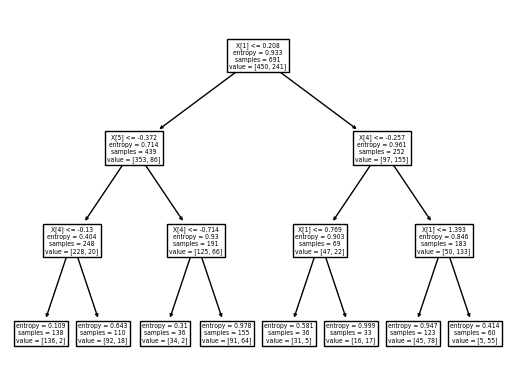

In [38]:
from sklearn import tree
tree.plot_tree(dtc)
plt.show()

In [39]:
y_pred=dtc.predict(Xtest_tf)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_pred,ytest)
cr=classification_report(ytest,y_pred)

In [44]:
print(cm)

[[42  9]
 [ 8 18]]


In [45]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        50
           1       0.69      0.67      0.68        27

    accuracy                           0.78        77
   macro avg       0.76      0.75      0.76        77
weighted avg       0.78      0.78      0.78        77



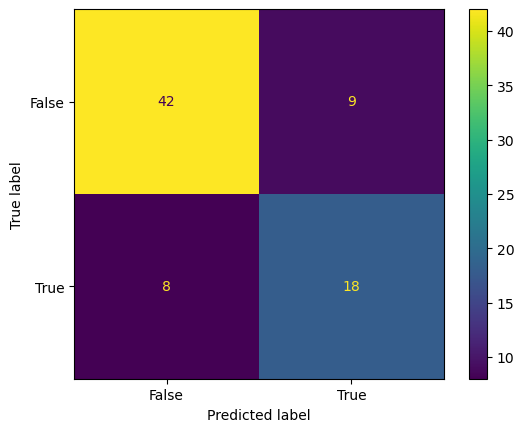

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cmplot.plot()
plt.show()